## Loading Data set

In [1]:
!cp '/content/drive/MyDrive/Transaction_Naration_Data_Set.csv' '/content/sample_data/'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/sample_data/Transaction_Naration_Data_Set.csv')

In [4]:
data

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.00,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.00,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.00,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
...,...,...,...,...,...,...
22546753,22546753,4010919,2550.00,29-APR-23,Credit Against Merchant Cash Withdraw Service ...,Credit
22546754,22546754,2607145,2550.00,29-APR-23,"Cash withdraw from Micro Merchant point, MM A/C",Debit
22546755,22546755,5728508,2550.00,29-APR-23,Credit Against Merchant Cash Withdraw Service ...,Credit
22546756,22546756,5939099,1512.75,29-APR-23,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [5]:
data.columns

Index(['Unnamed: 0', 'AC_ID', 'AMOUNT', 'DOC_DATE', 'NARATION', 'DR_CR'], dtype='object')

In [6]:
narration = data['NARATION'].to_frame()

In [7]:
narration

,NARATION
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
4,"Cash withdraw from Micro Merchant point, MM A/C"
...,...
22546753,Credit Against Merchant Cash Withdraw Service ...
22546754,"Cash withdraw from Micro Merchant point, MM A/C"
22546755,Credit Against Merchant Cash Withdraw Service ...
22546756,"Cash withdraw from Micro Merchant point, MM A/C"


In [8]:
SAMP_CNT = 20
narration.sample(n=SAMP_CNT)

,NARATION
8094855,Cash Withdrawal From A/C No.:
20809594,Cash Deposit
10039478,Cash Withdraw
15316123,Cash Deposit
14402522,Cash Deposit to A/C No.:
15238570,DPS Installment Collection
17074481,Cash Withdraw
14161877,Debit For Mobile () Recharge. FT frm for
17394527,Cash Withdrawal From A/C No.:
1104471,Inter Agent Cash Withdraw


In [9]:
narration.describe()

,NARATION
count,22545735
unique,128603
top,Cash Withdrawal From A/C No.:
freq,2359719


In [10]:
unique_narrations = narration.drop_duplicates()

In [11]:
del data, narration

In [12]:
unique_narrations.sample(n=SAMP_CNT)


,NARATION
10511316,"EFTN Transaction, Agrani Bank Ltd., JHITKA BAZ..."
5577194,PLZ CREDIT TO A/C NO# FVG.MD.MEZBAH UDDIN BHUY...
17445642,Mamun Phone Service Fee
8717984,Withdraw Against Cash Deposit by Mithun A/C N...
13499089,Royal fashion
5732998,"montu shak, Cheque # AD-"
8825846,"Smart App, Fund Transfer. Pay to Jamirul Account"
3749664,Md. Fuadur Rahman
20323575,"Cash Deposit,Beauty,Cash Deposit,Beauty,Dulalp..."
4868969,"Golap ,kamrabo"


In [13]:
unique_narrations.rename(columns = {'NARATION' : 'text'}, inplace = True)

<ipython-input-13-8da7a7b2cb53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_narrations.rename(columns = {'NARATION' : 'text'}, inplace = True)


## Cleaning

In [22]:
df = unique_narrations.copy(deep=True)

In [23]:
def toLower(df):
  df['text'] = df['text'].apply(lambda z : str(z).lower())

def eliminateNonAlphabet(df):
  df['text'] = df['text'].replace( r'[^A-Za-z ]+', '', regex=True)

def tokenize(df):
  import nltk
  nltk.download('punkt')
  df['text'] = df['text'].apply(nltk.word_tokenize)

def dropEmpty(df):
  df.drop(df[df['text'].map(len) == 0].index, inplace = True)

def lematize(df):
  import nltk
  from nltk.stem import WordNetLemmatizer
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  df['text'] = df['text'].apply(lambda z : [lemmatizer.lemmatize(x) for x in z])

def removeWord(df, stop):
  df['text'] = df['text'].apply(lambda z : [word for word in z if word not in stop])

def removeGeneralStopWords(df):
  import nltk
  from nltk.corpus import stopwords
  nltk.download("stopwords")
  stop = set(stopwords.words("english"))
  removeWord(df, stop)

def showAppearances(df1, df2, text):
  return df1.loc[df2[df2['text'].map(lambda z : text in z) == True].index]

def removeDup(df):
  df.drop_duplicates(inplace = True)

# def removeEmptyTokensRows(df):
#   df.drop(df[df['text'].map(len) == 0].index, inplace = True)

def removeCustomWords(df):
  stops = ['ac', 'ae', 'md', 'akter', 'hossain', 'rahman', 'ltd', 'bazar', 'unnayan', 'dol', 'polli', 'mohila', 'ad', 'mia', 'ali', 'uddin', 
         'begum', 'tk', 'islam', 'amt', 'abdul', 'hasan', 'sonali', 'alam', 'miah', 'bangladesh' , 'per', 'taka',
         'da', 'vai', 'agrani' , 'ahmed', 'hossen', 'khan', 'abu', 'janata', 'al', 'unnayon', 'b', 'amin', 'mamun', 'khatun', 'unnoyon',  'nur', 'haque']
  notSure = ['mo', 'cap','fvg', 'islami', 'br', 'id' , 'dal', 'purush', 'nid', 'purpose', 'title', 'para', 'roll']
  months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
  removeWord(df, set(stops + notSure + months))

def replaceWord(df):
  def func(lst):
    try:
      index = lst.index('withdrawal')
      lst[index] = 'withdraw'
    except:
      None
    return lst
  df['text'] = df['text'].apply(func)

def removeNonEnglishWord(df,keep):
  import nltk
  nltk.download('words')
  from nltk.corpus import words
  wordSet = set(words.words())
  def func(row):
    r2 = []
    for w in row:
      if (w in wordSet) or (w in keep):
        r2.append(w)

    return r2 

  df['text'] = df['text'].apply(func)

# def removeNonEnglishWords(df):



In [16]:
def clean(df, rDup = True):
  toLower(df)
  eliminateNonAlphabet(df)
  if rDup:
    removeDup(df)
  tokenize(df)
  lematize(df)
  removeGeneralStopWords(df)
  removeCustomWords(df)
  replaceWord(df)
  dropEmpty(df)


In [24]:
def cleanEng(df, rDup = True):
  toLower(df)
  eliminateNonAlphabet(df)
  if rDup:
    removeDup(df)
  tokenize(df)
  lematize(df)
  removeGeneralStopWords(df)
  removeCustomWords(df)
  replaceWord(df)
  removeNonEnglishWord(df, set(['eftn', 'ft', 'bkash', 'nogod', 'rtgs', 'pos', 'sme', 'mst']))
  dropEmpty(df)

In [42]:
import nltk
nltk.download('words')
from nltk.corpus import words
'palli' in words.words()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [25]:
cleanEng(df, True)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


,text
0,"[cash, withdraw]"
1,"[cash, withdraw]"
2,"[cash, withdraw, micro, merchant, point]"
3,"[credit, merchant, cash, withdraw, service]"
6,"[cash, deposit]"
...,...
22534198,"[transaction, fund, transfer, smart, regular, ..."
22534938,"[smart, regular, fund, transfer]"
22535747,"[smart, regular, fund, transfer, bank]"
22536483,"[cash, deposit, sme]"


## Exploration After Cleaning

In [26]:
def plotFreqWords(df, n, title = 'Most Frequently Found Words in Narration', shape = (8,8)):
  import itertools
  import collections
  import pandas as pd
  import matplotlib.pyplot as plt
  lemmatized_tokens = list(df['text'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  top_words = pd.DataFrame(counts_no.most_common(n), columns = ['words', 'count'])
  fig, ax = plt.subplots(figsize=shape)
  top_words.sort_values(by='count').plot.barh(x = 'words', y = 'count', ax = ax, color = 'blue')
  ax.set_title(title)
  plt.show()


In [27]:
pd.set_option('display.max_colwidth', None)
showAppearances(unique_narrations, df,'aschrexm')

,text


In [28]:
showAppearances(unique_narrations, df,'miaamlabo')


,text


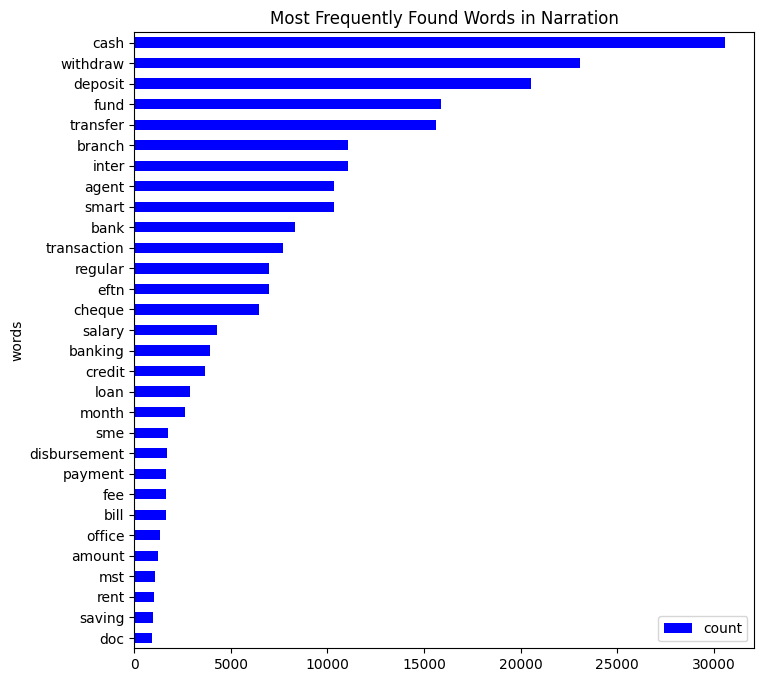

In [29]:
plotFreqWords(df, 30)

## Embedding Word2Vec

### Pre Trained w2v

In [25]:
!cp  '/content/drive/MyDrive/word2vec-google-news-300.gz' '/content/'


In [26]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# import gensim.downloader as api
# path = api.load("word2vec-google-news-300", return_path=True)
# model = api.load("word2vec-ruscorpora-300")
# print(path)

In [28]:
# !cp '/root/gensim-data/word2vec-ruscorpora-300/word2vec-ruscorpora-300.gz' '/content/drive/MyDrive'

In [29]:
def getVectorsPre(path, limit):
  import gensim
  from gensim.models import Word2Vec
  model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True, limit = limit)
  return model

# def getEncodingsPreTrainedW2V(df, path, limit):
#   import gensim
#   from gensim.models import Word2Vec
#   model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True, limit = limit)

#   import numpy as np
#   dim = 300
#   def getSentEmbedding(txt):
#     # print(type(txt))
#     s = np.zeros(dim)
#     for x in txt:
#       y = str(x)
#       if y in model:
#         s += model[y]
#     l = len(txt)
#     return (s / l) if l != 0 else s
#   return  np.vstack(df['text'].apply(getSentEmbedding).values)


In [30]:
# encodings = getEncodingsPreTrainedW2V(df,"/content/drive/MyDrive/word2vec-google-news-300.gz", 1000000)

### Trained W2V

In [31]:
def getVectors(df, min_count = 5):
  
  import multiprocessing
  from gensim.models import Word2Vec


  texts = df.text.tolist()
  cores = multiprocessing.cpu_count()
  w2v_model = Word2Vec(min_count=min_count,
                      window=5,
                      vector_size=100,
                      sample=.001, 
                      alpha=0.03, 
                      min_alpha=0.0007, 
                      workers=cores-1)
  print(w2v_model.build_vocab(texts, progress_per=50000))
  print(w2v_model.train(texts, total_examples=w2v_model.corpus_count, epochs=50, report_delay=1))
  vectors = w2v_model.wv
  return vectors

def getEncodings(df,vectors, dim = 100):
  import numpy as np
  def getSentEmbedding(txt):
    s = np.zeros(dim)
    c = 0
    for x in txt:
      y = str(x)
      if y in vectors:
        s += vectors[y]
        c += 1
    return (s / c) if c != 0 else s


  # df['embedding'] = df['text'].apply(getSentEmbedding)
  # encodings = df['embedding'].values
  return np.vstack(df['text'].apply(getSentEmbedding).values)
  

# def getEncodingsTrainedW2V(df, min_count = 5, vectors = None):
#   if vectors in None:
#     vectors = getVectors(df, min_count)
  
#   def getSentEmbedding(txt):
#     dim = 100
#     s = np.zeros(dim)
#     c = 0
#     for x in txt:
#       y = str(x)
#       if y in vectors:
#         s += vectors[y]
#         c += 1
#     return (s / c) if c != 0 else s


#   # df['embedding'] = df['text'].apply(getSentEmbedding)
#   # encodings = df['embedding'].values
#   return np.vstack(df['text'].apply(getSentEmbedding).values), vectors
#   # encodings = np.vstack(encodings)
#   # return encodings


## KMClustering

### Functions

In [32]:
def normalize(encodings):
  import numpy as np
  norm = np.linalg.norm(encodings, axis = 1, keepdims = True)
  norm[norm == 0] = 1
  norm_encodings = encodings / norm
  return norm_encodings

def cluster(df, norm_encodings, k, colName):
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_score
  
  kmeans = KMeans(n_clusters=k).fit(norm_encodings)
  centroids = kmeans.cluster_centers_
  cluster_assignment = kmeans.predict(norm_encodings)
  
  df[colName] = cluster_assignment
  return kmeans  


In [33]:
def createFreqWordsBarPlot(df, n, title = 'Most Frequently Found Words in Narration', shape = (8,8), ax = None):
  import itertools
  import collections
  import pandas as pd
  import matplotlib.pyplot as plt
  lemmatized_tokens = list(df['text'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  top_words = pd.DataFrame(counts_no.most_common(n), columns = ['words', 'count'])
  return top_words.sort_values(by='count').plot.barh(x = 'words', y = 'count', color = 'blue', ax = ax, title=title)


In [34]:
def plotClusterFreq(df,cluster_col, k, n, shape,ws,hs, s = 0):
  from math import sqrt, ceil
  import matplotlib.pyplot as plt
  a = int(sqrt(k - s))
  b = ceil((k - s) / a)
  # print(a,b)
  if b < a:
    a += 1
  a = int(a)
  tsh = ((shape[0] + ws) * a, (shape[1] + hs) * b)

  fig, ax = plt.subplots(nrows = a, ncols = b, figsize = tsh)
  plt.subplots_adjust(wspace=ws, hspace=hs)
  for i in range(s,k):
    # print (i // b, i % b)
    createFreqWordsBarPlot(df[df[cluster_col] == i],n,f'Cluster-{i}',shape,ax[i // b][i % b])
  plt.show()


### Clusterings

#### Clustering Pre-Trained W2V k=13

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


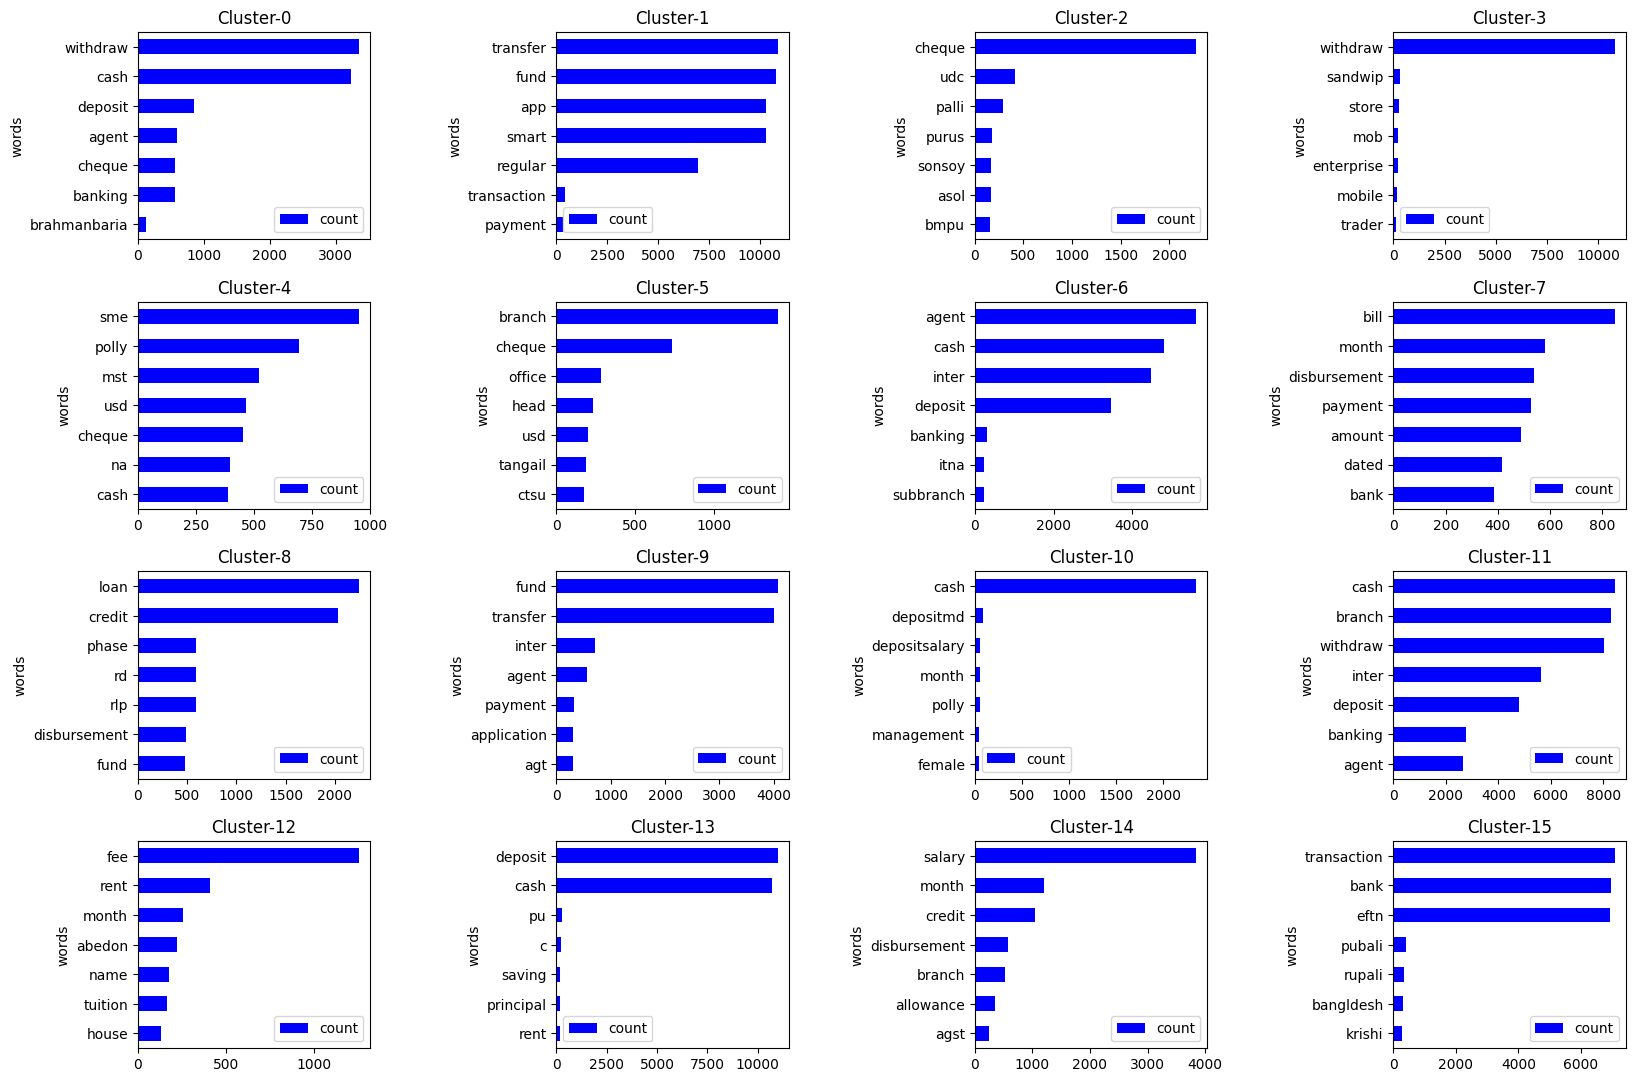

In [ ]:
k = 16
col = f'{k}-means-clustering'
n = 7
vectors = getVectorsPre('/content/drive/MyDrive/word2vec-google-news-300.gz', 1000000)
encodings = getEncodings(df, vectors, 300)
norm_encodings = normalize(encodings)
kmeans_model = cluster(df, norm_encodings, k, col)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)




#### Clustering Pre-Trained W2V k=15

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 5


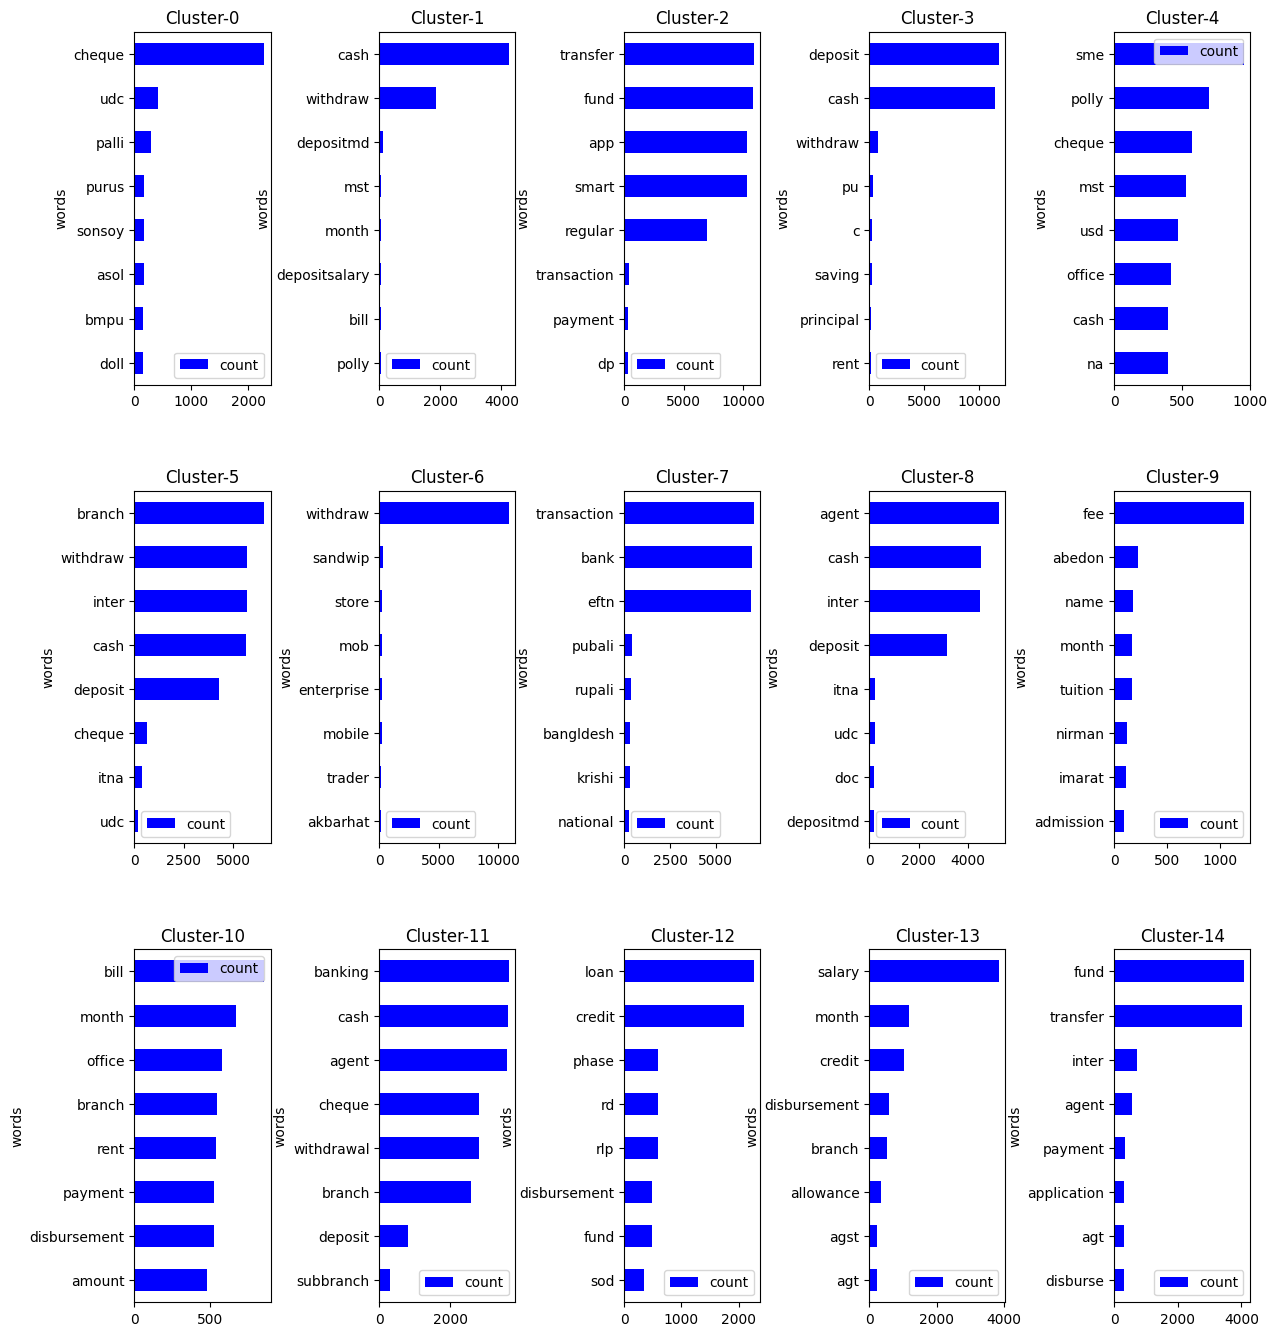

In [ ]:
k = 15
col = f'{k}-means-clustering'

encodings = getEncodingsPreTrainedW2V(df, '/content/drive/MyDrive/word2vec-google-news-300.gz', 1000000)
cluster(df, encodings, k, f'{k}-means-clustering')
plotClusterFreq(df,col,k,8,(4,3), .8, .3)


#### Clustering Trained W2V k=13

In [ ]:
df

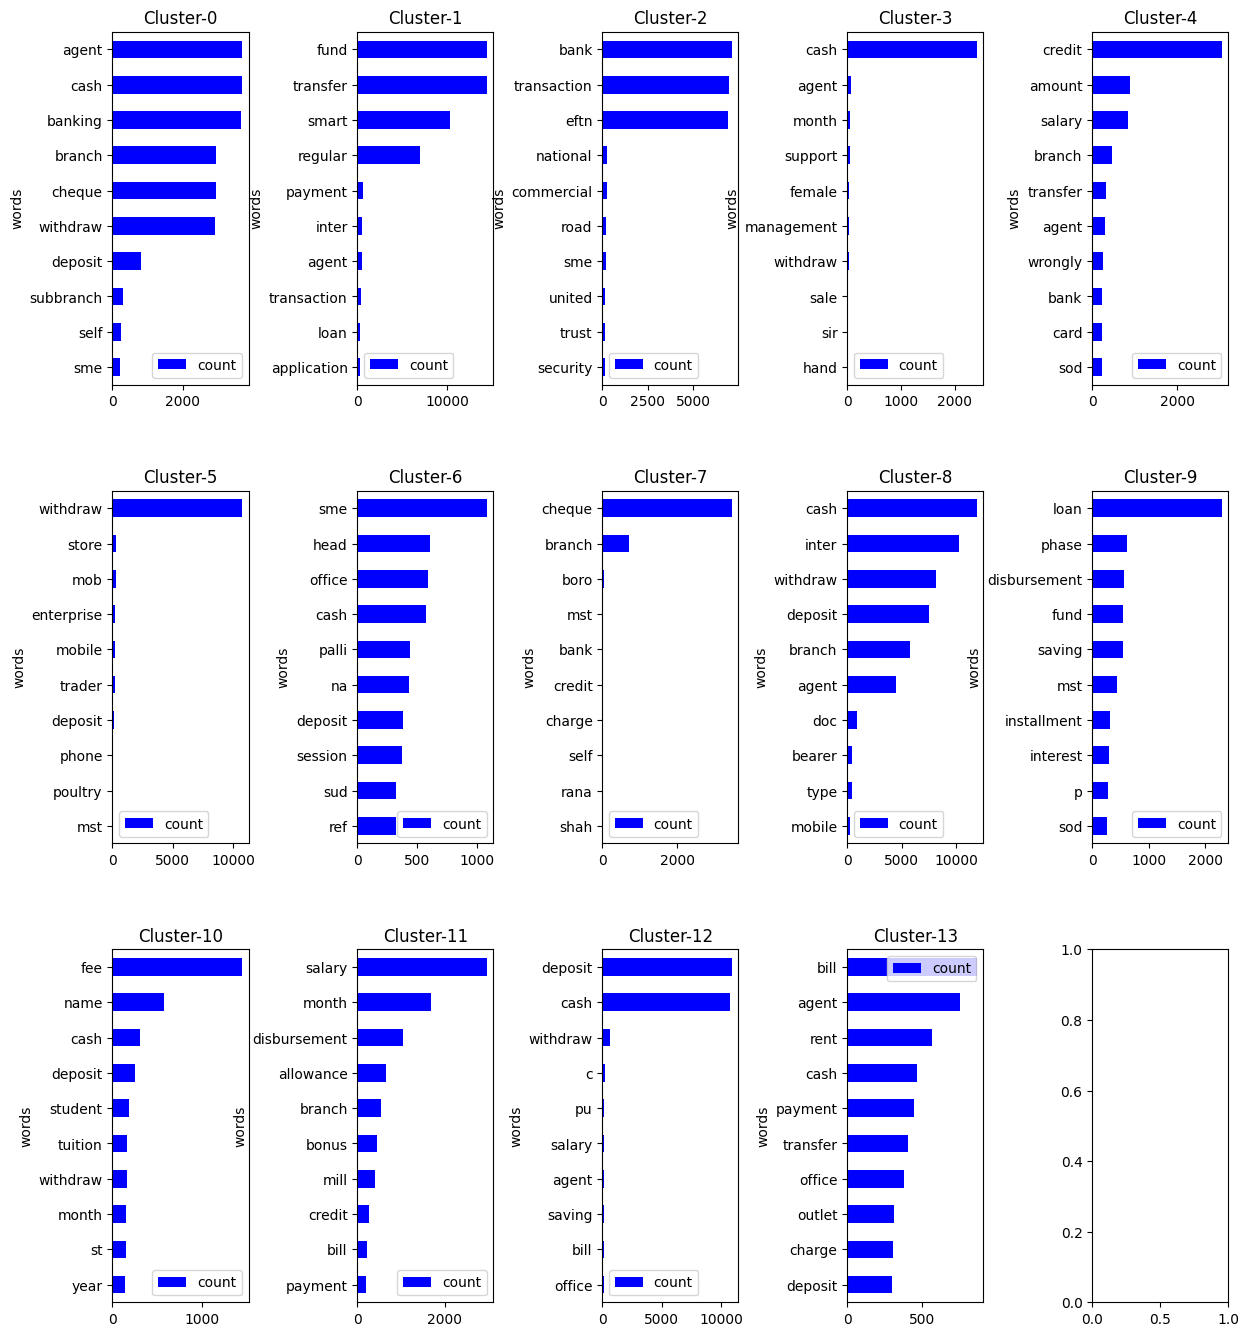

In [43]:
k = 14
col = f'{k}-means-clustering'
n = 10
# vectors = getVectors(df, 1)
# encodings = getEncodings(df, vectors)
# norm_encodings = normalize(encodings)
# kmeans_model = cluster(df, norm_encodings, k, col)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)



In [45]:
for i in range(k):
  print(i,df[df[col] == i].shape[0])

0 4313
1 14302
2 7238
3 2390
4 3764
5 10718
6 6419
7 3468
8 12776
9 3978
10 2353
11 4567
12 10883
13 7662


#### Clustering Trained W2V k=15

In [ ]:
plotClusterFreq(df,col,15,8,(4,3), .8, .3)


#### Clustering Trained min,k = 10,13

None
(7541682, 24697750)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 4


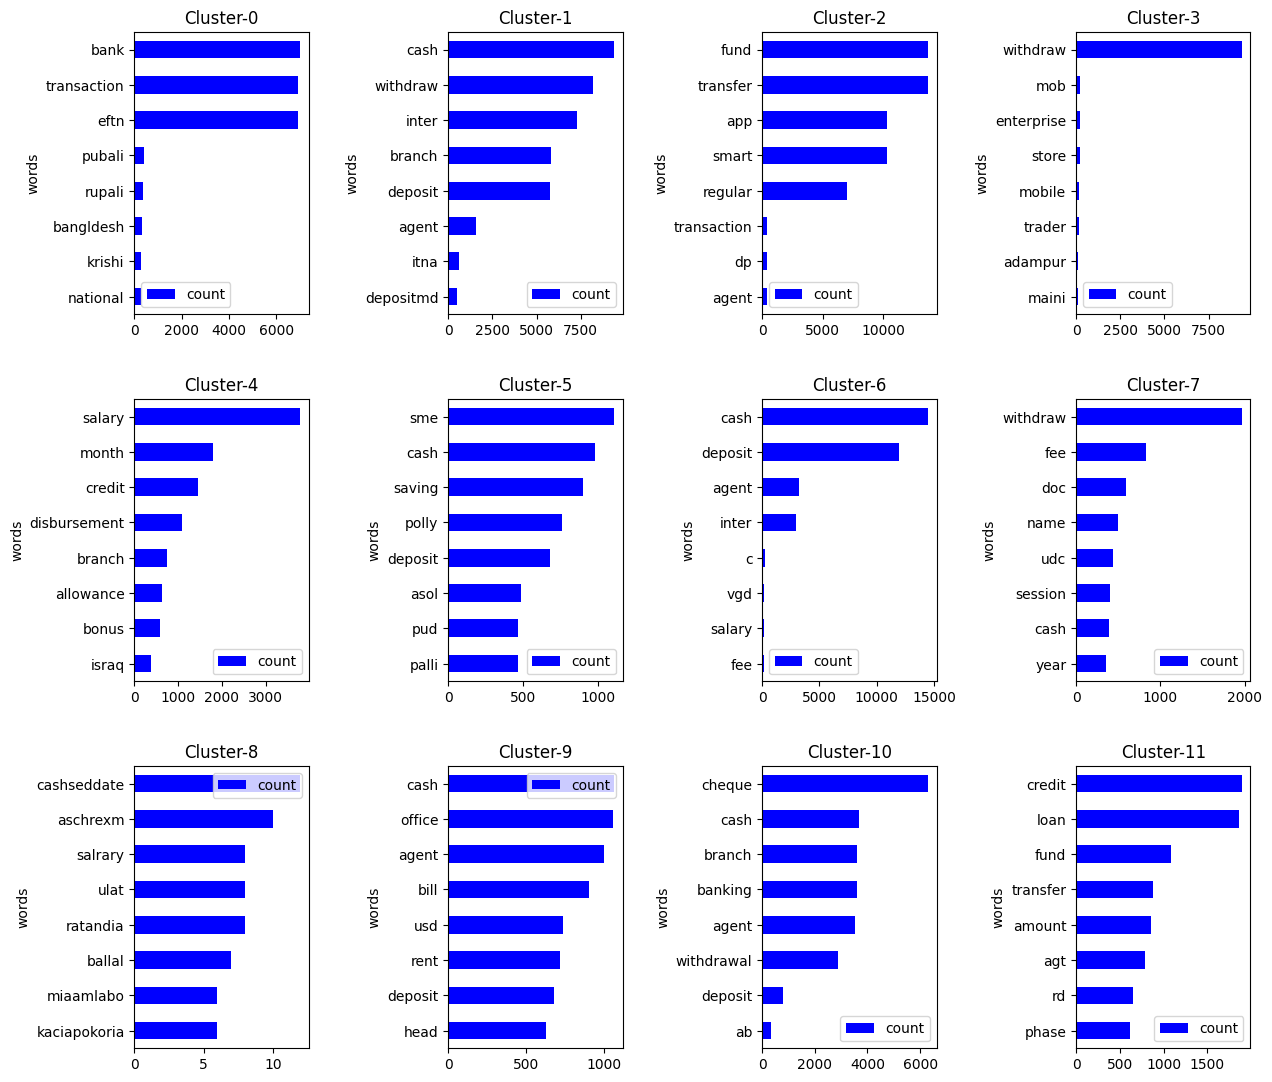

In [ ]:
k = 12
col = f'{k}-means-clustering-trained-mn-10'

encodings = getEncodingsTrainedW2V(df, 10)
cluster(df, encodings, k, col)
plotClusterFreq(df,col,k,8,(4,3), .8, .3)


#### Excess

In [ ]:
df.columns

Index(['text', 'embedding', '15-means-clustering', '13-means-clustering'], dtype='object')

In [ ]:
df.drop('embedding', axis = 1).to_csv('/content/drive/MyDrive/pred.csv')

In [ ]:
unique_narrations['15-means-clustering'] = df['15-means-clustering']

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
norm = np.linalg.norm(encodings, axis = 1, keepdims = True)
norm[norm == 0] = 1
norm_encodings = encodings / norm

In [ ]:
def trainModel(n, score):
  kmeans = KMeans(n_clusters=n).fit(norm_encodings)
  centroids = kmeans.cluster_centers_
  cluster_assignment = kmeans.predict(norm_encodings)
  centroids_assignment = centroids[cluster_assignment]
  dist = np.linalg.norm(norm_encodings - centroids_assignment, axis = 1, keepdims = True)
  err = np.sum(dist ** 2)
  score = 0
  if score:
    score = silhouette_score(norm_encodings, cluster_assignment)
  if score:
    return err, score
  return err

In [ ]:
def getErrs(start, end, score):
  errs = []
  scores = []
  for i in range(start, end + 1):
    err = 0
    score = 0
    if score:
      err, score = trainModel(i,score)
    else:
      err = trainModel(i, score)
    errs.append(err)
    scores.append(score)
  return errs, scores

In [ ]:
errs, scores = getErrs(6,18,False)

In [ ]:
errs

[33034.874257629635,
 30396.42347090422,
 28818.902232909244,
 27556.30106232315,
 26351.204425516426,
 25461.951474520807,
 24737.935248237765,
 24133.862026533952,
 23434.615090537674,
 22893.574198824383,
 22488.4889901675,
 21972.145377420475,
 21613.95453678744]

In [ ]:
errs.reverse()

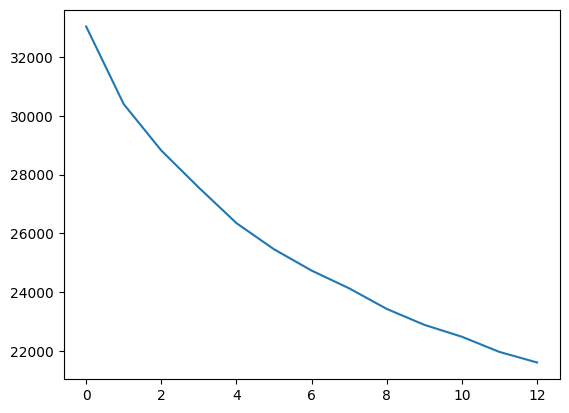

In [ ]:
import matplotlib.pyplot as plt

plt.plot(errs)

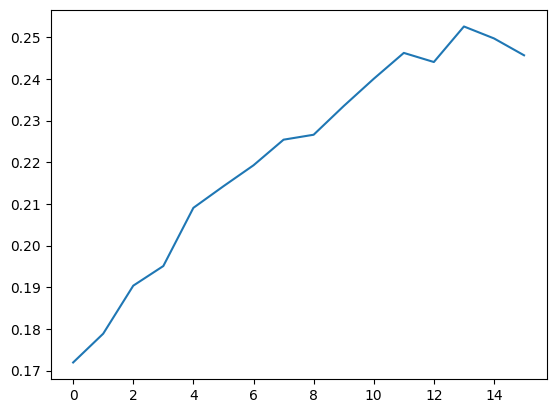

In [ ]:
import matplotlib.pyplot as plt

plt.plot(scores)

In [ ]:
errs, scores = getErrs(21, 30)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

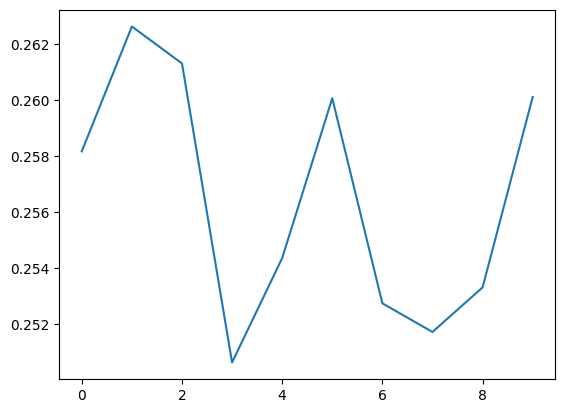

In [ ]:
import matplotlib.pyplot as plt

plt.plot(scores)

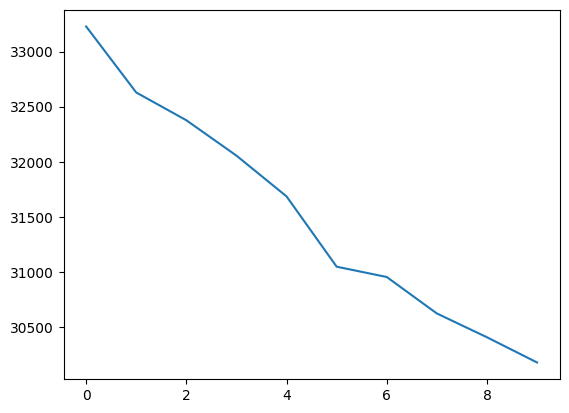

In [ ]:
plt.plot(errs)


In [ ]:
errs_, scores_ = getErrs(31, 35)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

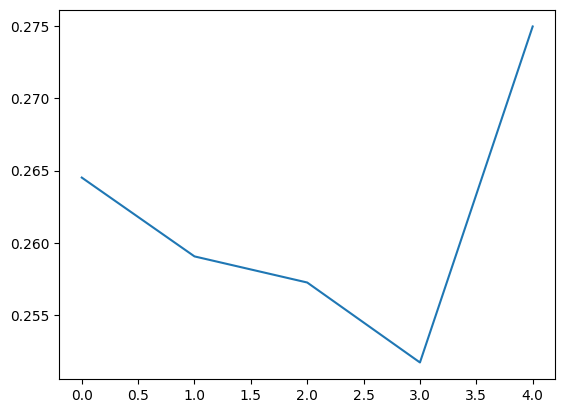

In [ ]:
plt.plot(scores_)


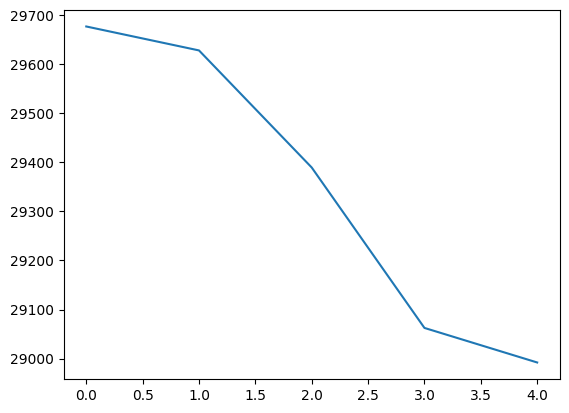

In [ ]:
plt.plot(errs_)


## Sentence Transoformers (End to End)

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=ce5d9b1d5faa45a7cb32d6d09fad2ee690b45be913d8806610cd96904d1944a1
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
sent_df = unique_narrations.copy(deep = True)
eliminateNonAlphabet(sent_df)
print(sent_df.shape)
removeDup(sent_df)
# print(sent_df.shape)
encodings = model.encode(sent_df['text'].to_list())


(128604, 1)


In [ ]:
encodings.shape

(123344, 384)

In [ ]:
k = 16
col = f'{k}-means-clustering'
norm_encodings = normalize(encodings)
kmeans_model = cluster(sent_df, norm_encodings, k, col)
# plotClusterFreq(sent_df,col,k,n,(4,3), .8, .3)


In [ ]:
testPath = '/content/drive/MyDrive/Test.xlsx'
import pandas as pd
testDf = pd.read_excel(testPath)
testDf.drop([0, '0.1', '0.2', '0.3', '0.5'],axis = 1,inplace = True)
testDf.rename(columns = {'0.4' : 'text', '0.6' : 'cluster'}, inplace = True)

In [ ]:
def getPredictionSent(df):
  encodings = model.encode(df['text'].to_list())
  norm_encodings = normalize(encodings)
  return kmeans_model.predict(norm_encodings)

In [ ]:
tdf = testDf.copy(deep = True)
eliminateNonAlphabet(tdf)
removeDup(tdf)
for i in range(1, 15):
  print(i,getPredictionSent(tdf[tdf['cluster'] == i]))

1 [5 0 0 0]
2 [6 6]
3 [14]
4 [14]
5 [ 2 14]
6 [14]
7 [14  2]
8 [14]
9 [0 0]
10 [14 14]
11 [2]
12 [2]
13 [14 14 14]
14 [2]


In [ ]:
tdf[tdf['cluster'] == 12]

,text,cluster
44,CIB Charge VAT of,12


In [ ]:
'esfn' in vectors

False

In [ ]:
tdf.shape

(24, 2)

### Lang Detection

In [ ]:
!pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=3ff6f8cb974e5d3a96e9bad799f3728b02fd98473e4d84ed9a43ab840eca8487
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
import langid
langid.classify("জাকির মোমিন রবিউল উকিল আলামিন শাহাদত আনিছ মোট  হাজার টাকা নভেম্বর মাস")

('bn', -446.38835191726685)

In [ ]:
cnt = 0
for i in range(uniques.shape[0]):
  text = uniques.iloc[i]['NARATION']
  try:
    lang = langid.classify(text)[0]
    if(lang == 'bn'):
      cnt += 1
      # print(text)
      # print(lang)
  except Exception as error :
    print(text, lang, i)
    # print(lang)
    print(error)
    break

print(cnt)

831


In [ ]:
model.encode(['THis is a sentence'])

In [ ]:
arr = uniques.loc[:,'NARATION'].values

In [ ]:
arr


In [ ]:
type(arr)

numpy.ndarray

In [ ]:
enocdings = model.encode(arr)

In [ ]:
enocdings

array([[ 0.00188374,  0.04863172, -0.02690281, ...,  0.01412175,
        -0.00927342, -0.04137693],
       [-0.07740939,  0.0434949 , -0.01827168, ..., -0.03888908,
        -0.06046326,  0.00504448],
       [ 0.02279887,  0.03478767, -0.03007546, ..., -0.03131324,
        -0.08227921, -0.01777196],
       ...,
       [ 0.02806198,  0.010154  , -0.05075606, ...,  0.04637393,
         0.04741295, -0.0801269 ],
       [ 0.07406023,  0.0173737 , -0.09031081, ...,  0.0308701 ,
         0.06341256, -0.05154131],
       [ 0.0792704 , -0.01986493, -0.07471365, ..., -0.01642665,
         0.06073492, -0.05393577]], dtype=float32)

In [ ]:
enocdings[0]

In [ ]:
encodings = enocdings

## DBSCAN

In [43]:
def clusterDBSCAN(df,norm_encodings, col, mn, eps):
  from sklearn.cluster import DBSCAN
  dbscan=DBSCAN(min_samples = mn, eps = eps,algorithm='ball_tree')
  clustering = dbscan.fit(norm_encodings)
  df[col] = clustering.labels_
  return clustering

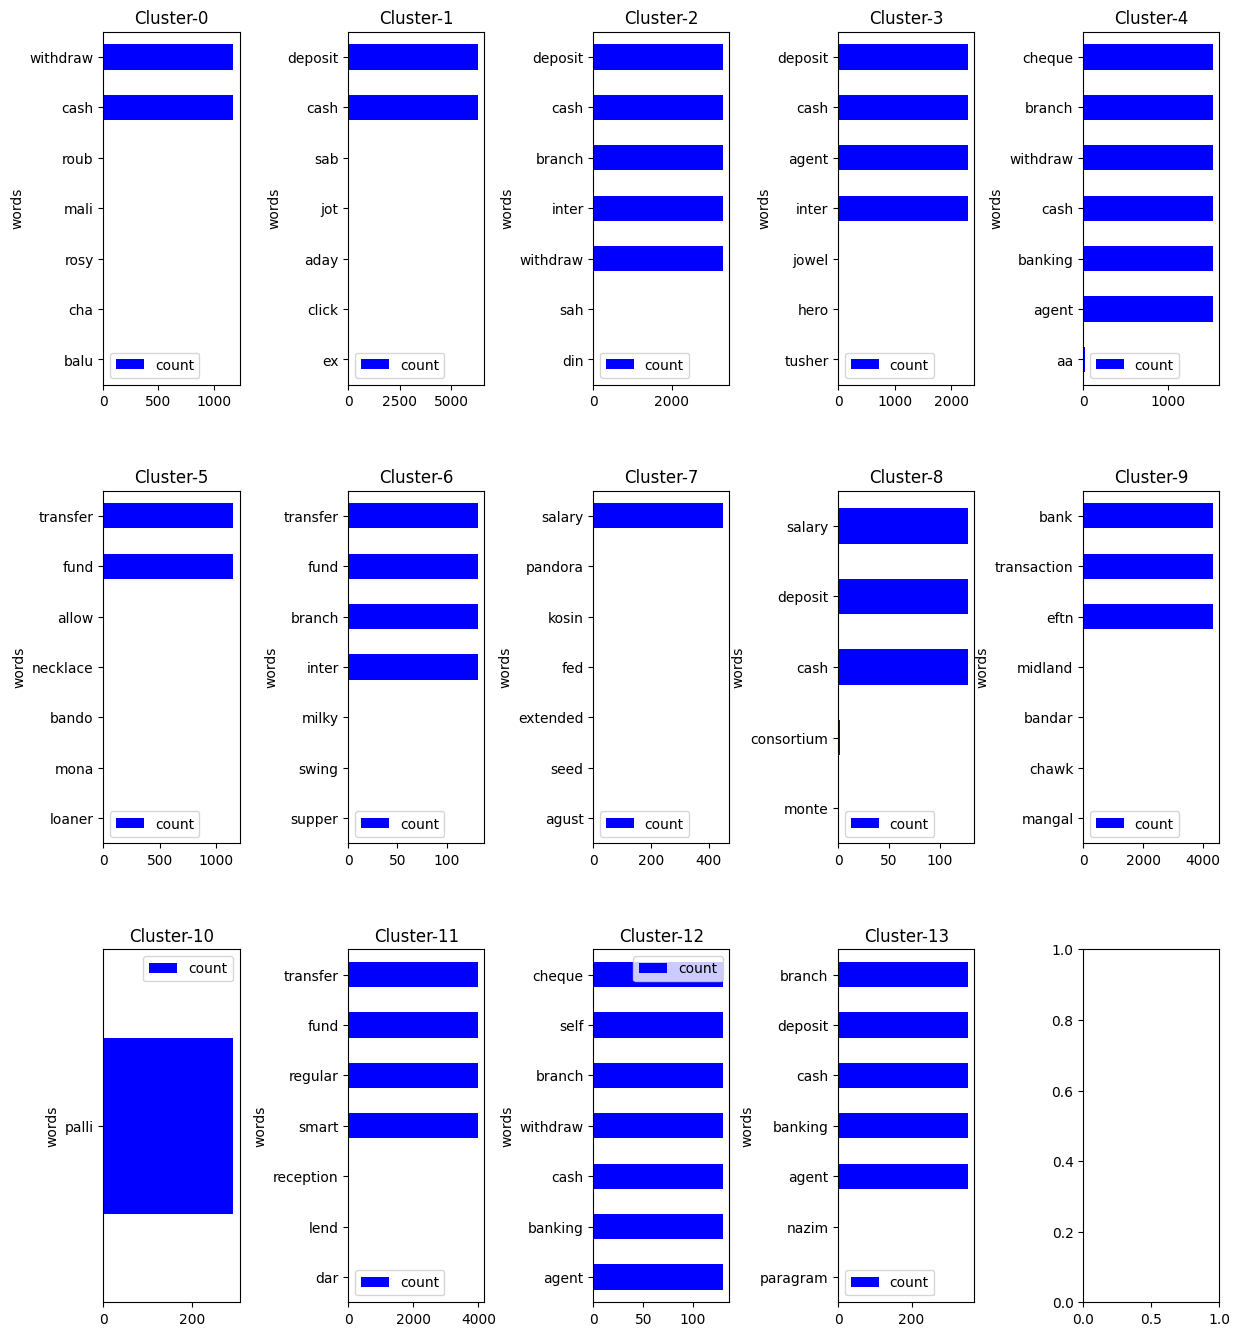

In [44]:
k = 14
col = f'{k}-means-clustering'
n = 7
# vectors = getVectors(df, 5)
# encodings = getEncodings(df, vectors)
# norm_encodings = normalize(encodings)
clusterModel = clusterDBSCAN(df, norm_encodings, col, 100, .1)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)


In [ ]:
encodings = getEncodingsPreTrainedW2V(df, '/content/word2vec-google-news-300.gz', 1000000)

In [ ]:
encodings = getEncodingsTrainedW2V(df)


None
(8604174, 24697750)


### 200-.1

In [ ]:
col = 'dbscan-200-.1'
clustering = clusterDBSCAN(df, encodings,col, 100, .3 )
k = len(set(clustering.labels_))
plotClusterFreq(df,col, k, 5, (4,3),.8,.3, -1)

### 200-.1-preTrained Weights

In [ ]:
col = 'dbscan-300-.05'
clustering = clusterDBSCAN(df, encodings,col, 300, .05 )
k = len(set(clustering.labels_))
plotClusterFreq(df,col, k, 5, (4,3),.8,.3, -1)

### 100 - .1

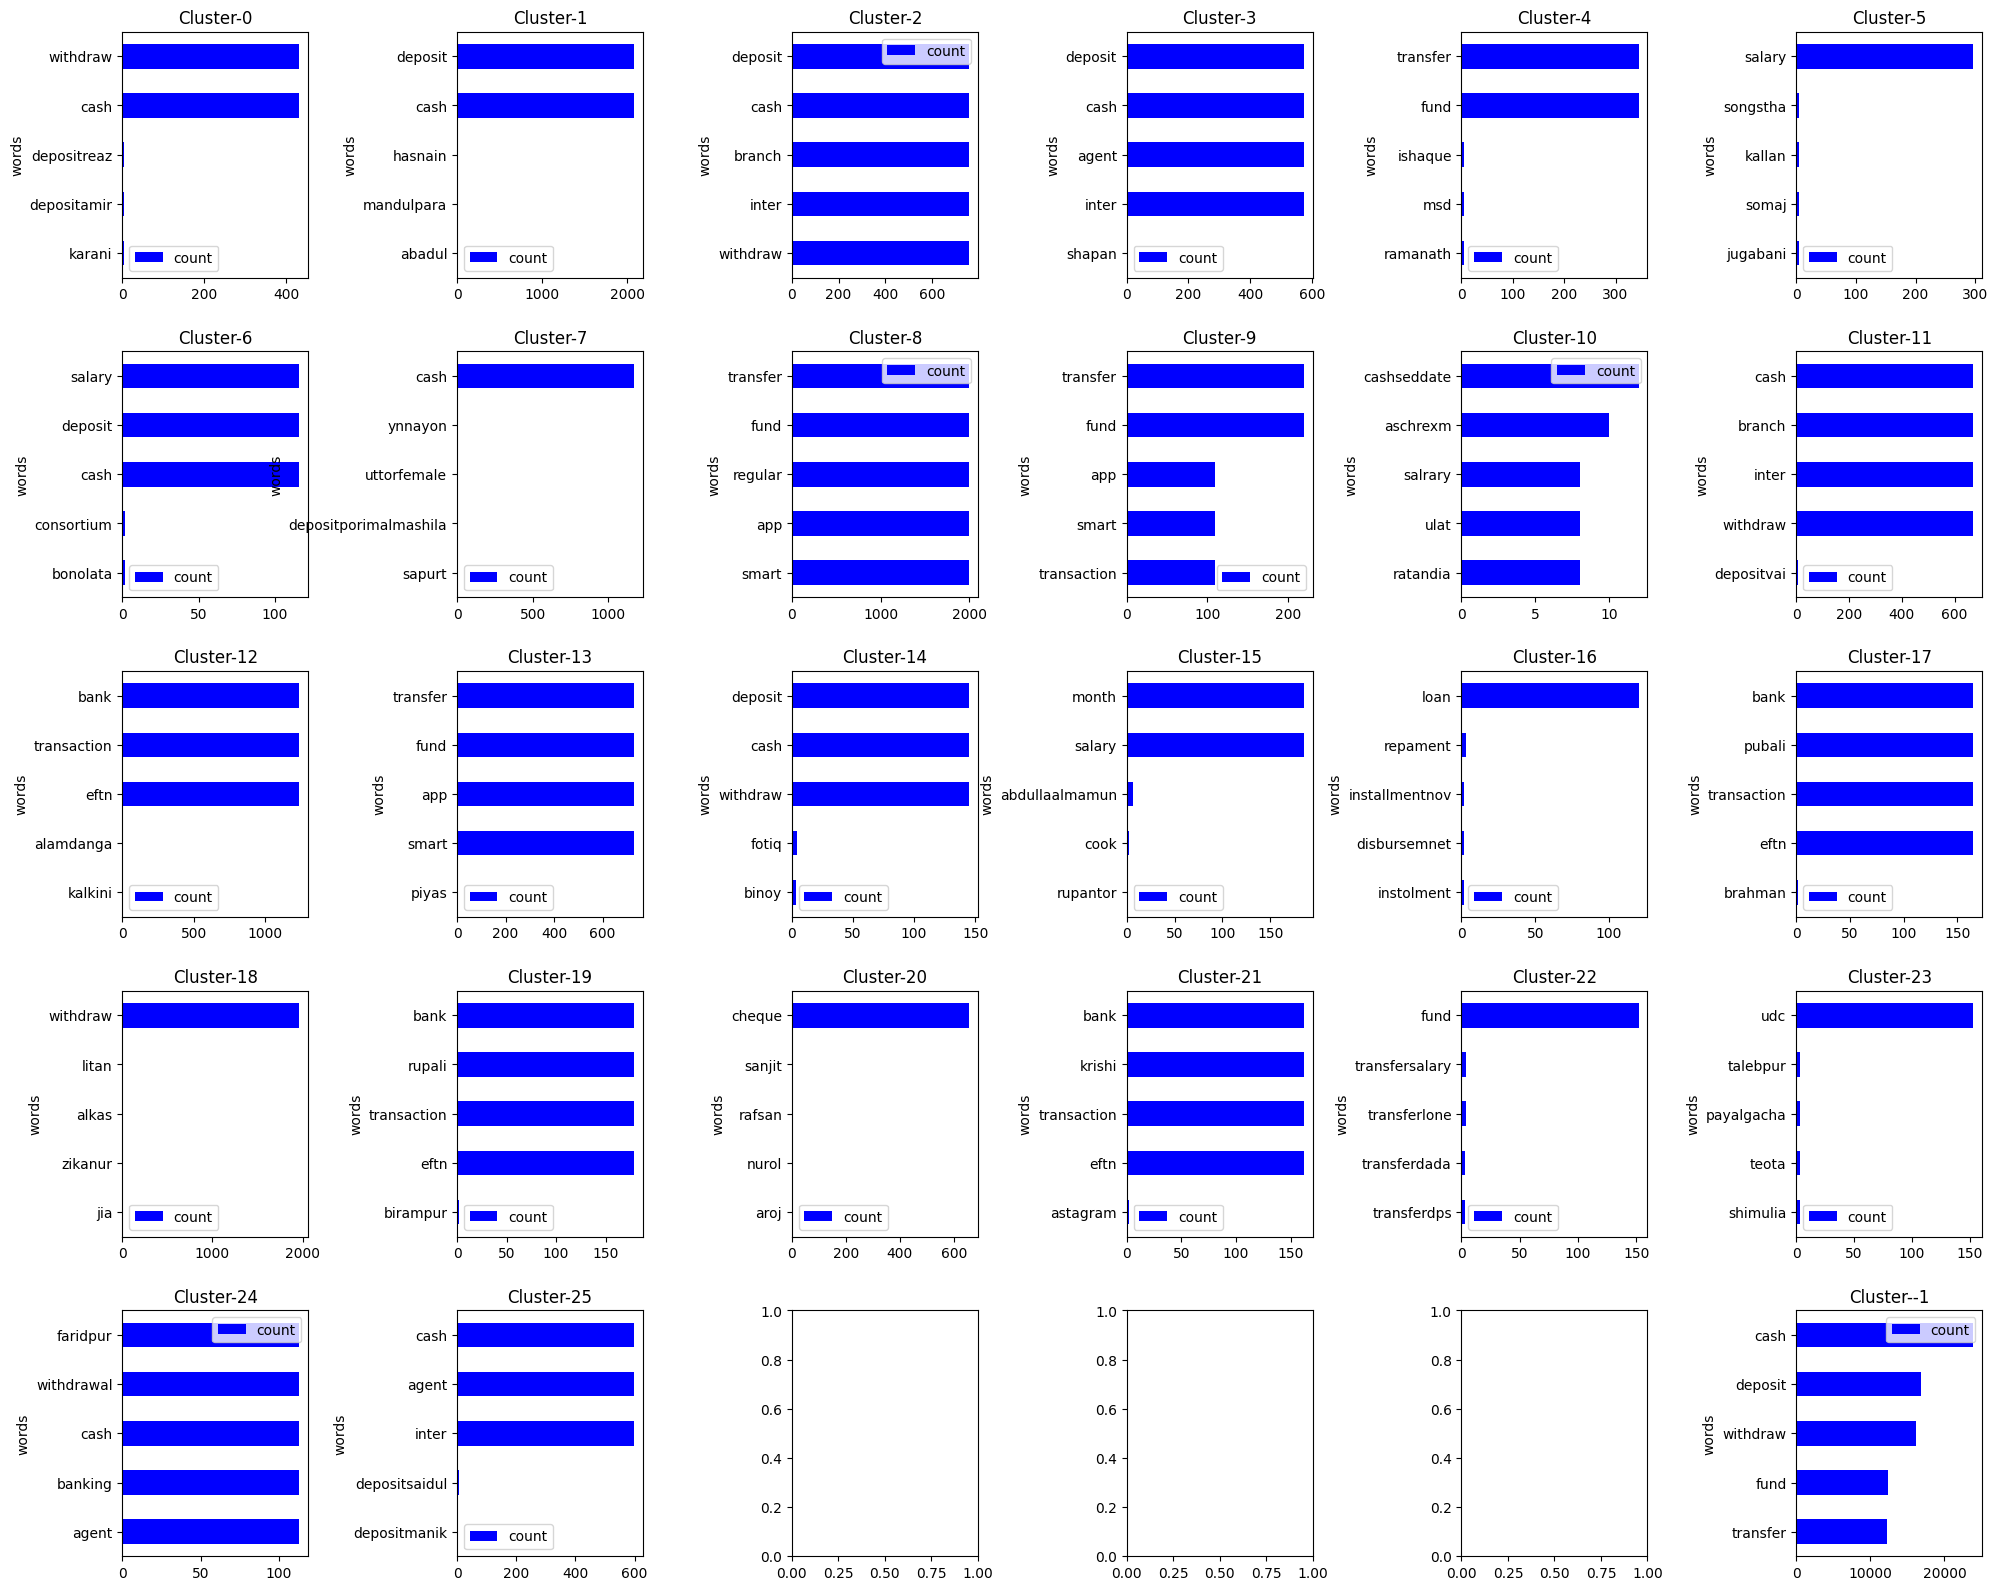

In [ ]:
col = 'dbscan-100-.1'
clustering = clusterDBSCAN(df, encodings,col, 100, .1 )
k = len(set(clustering.labels_)) - 1
plotClusterFreq(df,col, k, 5, (4,3),.8,.3, -1)

### 150 - 1.5

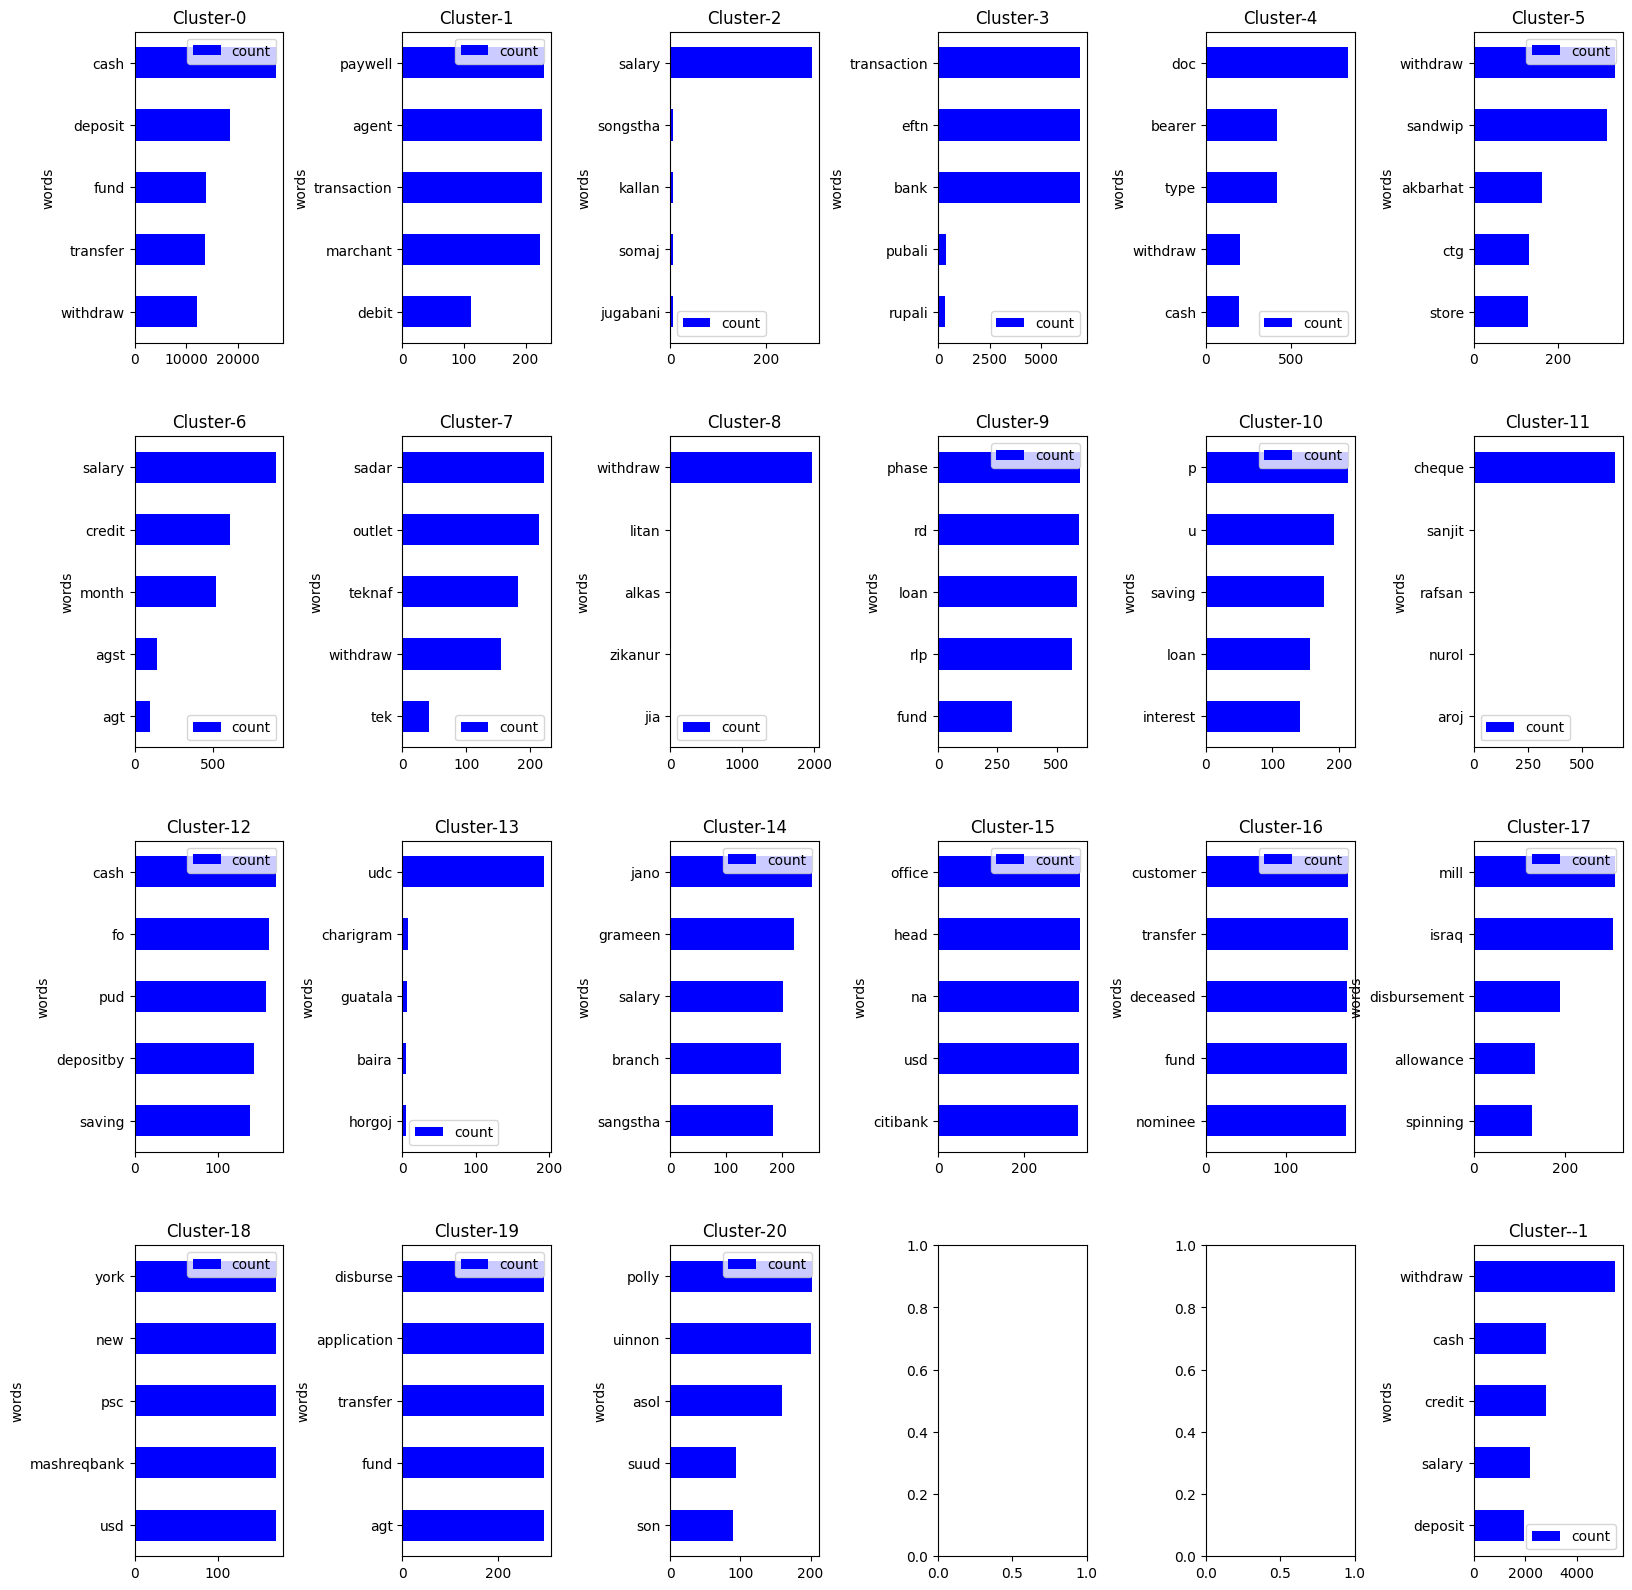

In [ ]:
mn = 150
eps = 1.5
col = f'dbscan-{mn}-{eps}'
clustering = clusterDBSCAN(df, encodings,col, mn, eps )
k = len(set(clustering.labels_)) - 1
plotClusterFreq(df,col, k, 5, (4,3),.8,.3, -1)

## Test

In [37]:
testPath = '/content/drive/MyDrive/Test.xlsx'
import pandas as pd
testDf = pd.read_excel(testPath)
testDf.drop([0, '0.1', '0.2', '0.3', '0.5'],axis = 1,inplace = True)
testDf.rename(columns = {'0.4' : 'text', '0.6' : 'cluster'}, inplace = True)

In [38]:
tdf = testDf.copy(deep = True)

In [39]:
cleanEng(tdf, True)
# encodings = getEncodings(tdf, vectors, 300)
# norm_encodings = normalize(encodings)
# predictions = kmeans_model.predict(norm_encodings)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [40]:
def getPrediction(df, vectors, kmeans_model, dim):
  encodings = getEncodings(df, vectors, dim)
  norm_encodings = normalize(encodings)
  return kmeans_model.predict(norm_encodings)

In [46]:
for i in range(1, 15):
  # print(tdf[tdf['cluster'] == i])
  print(i, getPrediction(tdf[tdf['cluster'] == i], vectors, kmeans_model, 100))

1 [ 8  8  8 13]
2 [12 12]
3 [4]
4 [13]
5 [13 13]
6 [13]
7 [13 13]
8 [4]
9 [8 0]
10 [13 13]
11 [13]
12 [13]
13 [13 13  1]
14 [13]


In [50]:
df[df[col] == 13].sample(30)

,text,14-means-clustering
15847774,"[vendor, amount, pay, order, issue, favor, delivery, delivery, service, delivery]",13
8841276,"[sir, dar]",13
19413347,[business],13
3338935,[arrange],13
1211839,"[debit, company, fund, collection, collection]",13
200634,"[agent, float, share]",13
8381557,"[p, bill]",13
9361094,"[gas, bill]",13
18575376,[profit],13
14129785,"[service, charge, electric, bill, month]",13


In [59]:
df[df['text'].map(len) <= 5]

,text,14-means-clustering
0,"[cash, withdraw]",8
1,"[cash, withdraw]",8
2,"[cash, withdraw, micro, merchant, point]",8
3,"[credit, merchant, cash, withdraw, service]",0
6,"[cash, deposit]",12
...,...,...
22533189,"[smart, regular, fund, transfer]",1
22533913,"[cash, deposit, global]",12
22534938,"[smart, regular, fund, transfer]",1
22535747,"[smart, regular, fund, transfer, bank]",1


In [ ]:
# testDf[(tdf['cluster'] == 3) | (tdf['cluster'] == 4) | (tdf['cluster'] == 6) | (tdf['cluster'] == 7) | (tdf['cluster'] == 11) | (tdf['cluster'] == 12) ]

,text,cluster
11,Debit For New ATM Card Charge.,3
13,Debit Against Palli Bidyut Bill Collection.,4
22,Debit Against Palli Bidyut Bill Collection.,4
25,Debit Against Debit Card Transaction,6
29,Project (Social Safety Net Payment) Payment to A/C:,11
34,Debit Against Palli Bidyut Bill Collection.,4
44,CIB Charge & VAT of,12
47,Debit Against Company Fund Collection (MetLife Alico),7
48,Project (Social Safety Net Payment) Payment to A/C:,7
49,Debit Against Debit Card Transaction,6


## Named Entity Recognition

In [ ]:
unique_narrations

,text
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
6,Cash Deposit to A/C No.:
...,...
22538287,Guatala Udc
22539045,"Transaction For Fund Transfer. Smart App, Regu..."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা


In [ ]:
! python -m spacy download en_core_web_lg

2023-05-26 09:26:41.728522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 09:26:42.551124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from spacy import displacy
from spacy import tokenizer
import en_core_web_lg
nlp = en_core_web_lg.load()


In [ ]:
text = 'Abdur Rahman is an employee'
doc = nlp(text)
print(doc)

Abdur Rahman is an employee


In [ ]:
list(doc.ents)

[Abdur Rahman]

In [ ]:
for x in doc:
  print(x)

Abdur
Rahman
is
an
employee


In [ ]:
def removeEntity(s):
  s = str(s)
  doc = nlp(s)
  names = [x.text for x in doc.ents]
  # print(names)
  for n in names:
    s = s.replace(str(n),'')
  return s

In [ ]:
unique_narrations_nr = unique_narrations.copy(deep=True)
unique_narrations_nr['text'] = unique_narrations_nr['text'].apply(removeEntity)

In [ ]:
unique_narrations_nr

,text
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from point, /C"
3,Credit Against Merchant Cash Withdraw Service ...
6,Cash Deposit to A/C No.:
...,...
22538287,
22539045,". , Regular Fund Transfer To A/C: ."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261,আসাদ এর কাছে জমা


In [ ]:
unique_narrations

,text
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
6,Cash Deposit to A/C No.:
...,...
22538287,Guatala Udc
22539045,"Transaction For Fund Transfer. Smart App, Regu..."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা


In [ ]:
SAMP_CNT = 10